# Module 4 - Algo Trading using Classification


   ### Welcome to the Answer notebook for Module 4 ! 
Make sure that you've submitted the module 3 notebook and unlocked Module 4 yourself before you start coding here


#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

### Query 4.1 
Import the csv file of the stock which contained the Bollinger columns as well.



In [1]:
import pandas as pd
import numpy as np

jubl = pd.read_csv('week3.csv')
jubl.dropna(subset=['bollinger'], axis=0, inplace=True)
jubl.reset_index(inplace=True, drop=True)
jubl.head(10)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,Year,vwap_num,Day_Perc_Change,Trend,Beta,Sma,Lma,bollinger,upper,lower
0,JUBLFOOD,EQ,2017-06-01,914.90,920.00,920.00,898.10,912.50,912.25,909.03,...,2017,8.406229e+08,-0.289649,Slight or No change,0.661813,NaN,NaN,988.486429,1096.784082,880.188775
1,JUBLFOOD,EQ,2017-06-02,912.25,914.25,934.80,908.30,932.00,930.85,924.04,...,2017,5.776027e+08,2.038915,Positive,0.602978,NaN,NaN,982.366429,1095.088492,869.644365
2,JUBLFOOD,EQ,2017-06-05,930.85,931.00,949.00,926.10,932.10,936.05,940.24,...,2017,4.811606e+08,0.558629,Slight positive,0.325592,NaN,NaN,975.079286,1084.257078,865.901494
3,JUBLFOOD,EQ,2017-06-06,936.05,936.05,965.80,935.20,956.90,952.55,954.52,...,2017,1.139436e+09,1.762726,Positive,0.252962,NaN,NaN,968.978571,1071.912942,866.044200
4,JUBLFOOD,EQ,2017-06-07,952.55,957.20,961.35,945.00,956.45,955.20,952.61,...,2017,4.515708e+08,0.278201,Slight or No change,0.265875,NaN,NaN,963.179286,1059.305155,867.053416
5,JUBLFOOD,EQ,2017-06-08,955.20,952.00,971.90,952.00,963.40,963.80,963.02,...,2017,4.822402e+08,0.900335,Slight positive,0.276247,NaN,NaN,958.735000,1048.009966,869.460034
6,JUBLFOOD,EQ,2017-06-09,963.80,964.00,975.00,952.45,973.00,969.10,962.46,...,2017,3.593345e+08,0.549907,Slight positive,0.282219,NaN,NaN,954.153571,1034.569659,873.737484
7,JUBLFOOD,EQ,2017-06-12,969.10,960.00,966.85,950.10,957.50,959.55,959.32,...,2017,2.551731e+08,-0.985450,Slight negative,0.364441,975.953333,NaN,950.573571,1024.595608,876.551535
8,JUBLFOOD,EQ,2017-06-13,959.55,961.15,973.00,953.00,970.70,970.05,965.68,...,2017,4.088334e+08,1.094263,Positive,0.322078,973.856190,NaN,948.970714,1020.417527,877.523901
9,JUBLFOOD,EQ,2017-06-14,970.05,962.00,968.00,952.00,968.00,962.60,959.06,...,2017,3.127073e+08,-0.768002,Slight negative,0.308162,969.894286,NaN,946.182857,1012.214044,880.151670


### Query 4.1a 

Create a new column 'Call' , whose entries are - 

>'Buy' if the stock price is below the lower Bollinger band 

>'Hold Buy/ Liquidate Short' if the stock price is between the lower and middle Bollinger band 

>'Hold Short/ Liquidate Buy' if the stock price is between the middle and upper Bollinger band 

>'Short' if the stock price is above the upper Bollinger band




In [2]:
jubl['Call'] = 'None'
for row in range(len(jubl)):
    
    if (jubl['Close Price'].iloc[row] > jubl['lower'].iloc[row]) and (jubl['Close Price'].iloc[row-1] < 
                                                                          jubl['bollinger'].iloc[row-1]):
        jubl['Call'].iloc[row] = 'Hold Buy'
        
    if (jubl['Close Price'].iloc[row] < jubl['upper'].iloc[row]) and (jubl['Close Price'].iloc[row-1] > 
                                                                         jubl['bollinger'].iloc[row-1]):
        jubl['Call'].iloc[row] = 'Hold Short'  
        
    if (jubl['Close Price'].iloc[row] < jubl['lower'].iloc[row]):
        jubl['Call'].iloc[row] = 'Buy'   
        
    if (jubl['Close Price'].iloc[row] > jubl['upper'].iloc[row]):
        jubl['Call'].iloc[row] = 'Short' 
               

/opt/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


### Decision Tree Entropy

In [3]:
cols = jubl[['bollinger','upper','lower']]
y = jubl['Call']

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix 
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

X_train, X_test, y_train, y_test = train_test_split(cols, y, test_size = 0.3, random_state = 100) 

dtree_entropy = DecisionTreeClassifier(criterion = "entropy", 
            random_state = 100,max_depth=3, min_samples_leaf=5)
dtree_entropy.fit(X_train,y_train)

entropy_pred = dtree_entropy.predict(X_test)

print("Confusion Matrix: ", confusion_matrix(y_test, entropy_pred))
print ("Accuracy : ", accuracy_score(y_test,entropy_pred)*100) 
print("Report : ", classification_report(y_test, entropy_pred))

Confusion Matrix:  [[ 0  5  1  0]
 [ 0 42  7  0]
 [ 0 51 29  0]
 [ 0  9  1  0]]
Accuracy :  48.96551724137931
Report :               precision    recall  f1-score   support

        Buy       0.00      0.00      0.00         6
   Hold Buy       0.39      0.86      0.54        49
 Hold Short       0.76      0.36      0.49        80
      Short       0.00      0.00      0.00        10

avg / total       0.55      0.49      0.45       145



/opt/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/opt/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Decision Tree Gini

In [4]:
dtree_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=3, min_samples_leaf=5)
dtree_gini.fit(X_train,y_train)

gini_pred = dtree_gini.predict(X_test)

print("Confusion Matrix: ", confusion_matrix(y_test, gini_pred))
print ("Accuracy : ", accuracy_score(y_test,gini_pred)*100) 
print("Report : ", classification_report(y_test, gini_pred))

Confusion Matrix:  [[ 0  3  3  0]
 [ 0 24 25  0]
 [ 0 21 59  0]
 [ 0  6  4  0]]
Accuracy :  57.24137931034483
Report :               precision    recall  f1-score   support

        Buy       0.00      0.00      0.00         6
   Hold Buy       0.44      0.49      0.47        49
 Hold Short       0.65      0.74      0.69        80
      Short       0.00      0.00      0.00        10

avg / total       0.51      0.57      0.54       145



/opt/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Naive Bayes

In [5]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train,y_train)

nb_pred = nb.predict(X_test)

print("Confusion Matrix: ", confusion_matrix(y_test, nb_pred))
print ("Accuracy : ", accuracy_score(y_test,nb_pred)*100) 
print("Report : ", classification_report(y_test, nb_pred))

Confusion Matrix:  [[ 0  5  1  0]
 [ 1 35 13  0]
 [ 0 50 30  0]
 [ 0  7  3  0]]
Accuracy :  44.827586206896555
Report :               precision    recall  f1-score   support

        Buy       0.00      0.00      0.00         6
   Hold Buy       0.36      0.71      0.48        49
 Hold Short       0.64      0.38      0.47        80
      Short       0.00      0.00      0.00        10

avg / total       0.47      0.45      0.42       145



/opt/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### KNN

In [6]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)

knn_pred = knn.predict(X_test)

print("Confusion Matrix: ", confusion_matrix(y_test, knn_pred))
print ("Accuracy : ", accuracy_score(y_test,knn_pred)*100) 
print("Report : ", classification_report(y_test, knn_pred))

Confusion Matrix:  [[ 0  5  1  0]
 [ 0 36 13  0]
 [ 0 41 39  0]
 [ 0  7  3  0]]
Accuracy :  51.724137931034484
Report :               precision    recall  f1-score   support

        Buy       0.00      0.00      0.00         6
   Hold Buy       0.40      0.73      0.52        49
 Hold Short       0.70      0.49      0.57        80
      Short       0.00      0.00      0.00        10

avg / total       0.52      0.52      0.49       145



/opt/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### SVM

In [7]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=0.025, random_state=101)
svm.fit(X_train,y_train)

svm_pred = svm.predict(X_test)

print("Confusion Matrix: ", confusion_matrix(y_test, svm_pred))
print ("Accuracy : ", accuracy_score(y_test,svm_pred)*100) 
print("Report : ", classification_report(y_test, svm_pred))

Confusion Matrix:  [[ 0  0  6  0]
 [ 0  2 47  0]
 [ 0  0 80  0]
 [ 0  0 10  0]]
Accuracy :  56.55172413793104
Report :               precision    recall  f1-score   support

        Buy       0.00      0.00      0.00         6
   Hold Buy       1.00      0.04      0.08        49
 Hold Short       0.56      1.00      0.72        80
      Short       0.00      0.00      0.00        10

avg / total       0.65      0.57      0.42       145



/opt/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, bootstrap = True, max_features = 'sqrt')

rf.fit(X_train,y_train)

rf_pred = rf.predict(X_test)

print("Confusion Matrix: ", confusion_matrix(y_test, rf_pred))
print ("Accuracy : ", accuracy_score(y_test,rf_pred)*100) 
print("Report : ", classification_report(y_test, rf_pred))

Confusion Matrix:  [[ 0  3  3  0]
 [ 1 35 11  2]
 [ 3 17 55  5]
 [ 0  4  4  2]]
Accuracy :  63.44827586206897
Report :               precision    recall  f1-score   support

        Buy       0.00      0.00      0.00         6
   Hold Buy       0.59      0.71      0.65        49
 Hold Short       0.75      0.69      0.72        80
      Short       0.22      0.20      0.21        10

avg / total       0.63      0.63      0.63       145



### New stock: Castrol

In [9]:
castrol = pd.read_csv('CASTROLIND.csv')
castrol.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,CASTROLIND,EQ,15-May-2017,437.70,438.00,452.00,435.50,449.75,449.85,445.95,2018406,9.001031e+08,29885,1637034,81.11
1,CASTROLIND,EQ,16-May-2017,449.85,451.90,452.00,442.25,443.80,443.00,443.78,534824,2.373424e+08,9438,387126,72.38
2,CASTROLIND,EQ,17-May-2017,443.00,443.60,444.50,438.35,439.00,439.55,440.69,377225,1.662384e+08,12293,223768,59.32
3,CASTROLIND,EQ,18-May-2017,439.55,437.95,440.00,432.25,434.20,433.95,435.10,398719,1.734823e+08,7171,211541,53.06
4,CASTROLIND,EQ,19-May-2017,433.95,436.65,446.85,434.00,438.50,437.10,439.51,886466,3.896110e+08,14752,354918,40.04


In [10]:
castrol['bollinger'] = castrol['Average Price'].rolling(window=14,center=False).mean()
std = castrol['Average Price'].rolling(window=14,center=False).std()
castrol['upper'] = castrol['bollinger'] + (std*2)
castrol['lower'] = castrol['bollinger'] - (std*2)
castrol.dropna(subset=['bollinger'], axis=0, inplace=True)
castrol.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,bollinger,upper,lower
13,CASTROLIND,EQ,01-Jun-2017,424.15,423.00,425.75,415.80,423.00,423.20,421.84,1027416,4.334091e+08,13373,521582,50.77,427.467143,450.077060,404.857226
14,CASTROLIND,EQ,02-Jun-2017,423.20,425.00,426.00,415.50,418.00,418.40,419.11,531324,2.226838e+08,14142,253848,47.78,425.550000,445.841694,405.258306
15,CASTROLIND,EQ,05-Jun-2017,418.40,419.00,421.35,411.50,411.65,412.70,416.05,469164,1.951954e+08,7182,264660,56.41,423.569286,441.468050,405.670522
16,CASTROLIND,EQ,06-Jun-2017,412.70,411.00,415.55,408.25,411.00,410.70,411.56,528713,2.175974e+08,9196,220990,41.80,421.488571,437.485509,405.491634
17,CASTROLIND,EQ,07-Jun-2017,410.70,411.45,415.00,411.00,413.00,413.85,413.59,340084,1.406546e+08,6654,179964,52.92,419.952143,434.371675,405.532611


In [11]:
castrol['Call'] = 'None'
for row in range(len(castrol)):
    
    if (castrol['Close Price'].iloc[row] > castrol['lower'].iloc[row]) and (castrol['Close Price'].iloc[row-1] < 
                                                                          castrol['bollinger'].iloc[row-1]):
        castrol['Call'].iloc[row] = 'Hold Buy'
        
    if (castrol['Close Price'].iloc[row] < castrol['upper'].iloc[row]) and (castrol['Close Price'].iloc[row-1] > 
                                                                         castrol['bollinger'].iloc[row-1]):
        castrol['Call'].iloc[row] = 'Hold Short'  
        
    if (castrol['Close Price'].iloc[row] < castrol['lower'].iloc[row]):
        castrol['Call'].iloc[row] = 'Buy'   
        
    if (castrol['Close Price'].iloc[row] > castrol['upper'].iloc[row]):
        castrol['Call'].iloc[row] = 'Short'
               

/opt/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [12]:
castrol.Call.value_counts()

Hold Buy      229
Hold Short    186
Buy            46
Short          21
Name: Call, dtype: int64

### Decision tree entropy

In [13]:
colsnew = castrol[['bollinger','upper','lower']]
y_new = castrol['Call']

entropy_pred_new = dtree_entropy.predict(colsnew)

print("Confusion Matrix: ", confusion_matrix(y_new, entropy_pred_new))
print ("Accuracy : ", accuracy_score(y_new,entropy_pred_new)*100) 
print("Report : ", classification_report(y_new, entropy_pred_new))

Confusion Matrix:  [[  0  46   0   0]
 [  0 229   0   0]
 [  0 186   0   0]
 [  0  21   0   0]]
Accuracy :  47.5103734439834
Report :               precision    recall  f1-score   support

        Buy       0.00      0.00      0.00        46
   Hold Buy       0.48      1.00      0.64       229
 Hold Short       0.00      0.00      0.00       186
      Short       0.00      0.00      0.00        21

avg / total       0.23      0.48      0.31       482



/opt/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Decision tree gini

In [14]:
gini_pred_new = dtree_gini.predict(colsnew)

print("Confusion Matrix: ", confusion_matrix(y_new, gini_pred_new))
print ("Accuracy : ", accuracy_score(y_new,gini_pred_new)*100) 
print("Report : ", classification_report(y_new, gini_pred_new))

Confusion Matrix:  [[  0  46   0   0]
 [  0 229   0   0]
 [  0 186   0   0]
 [  0  21   0   0]]
Accuracy :  47.5103734439834
Report :               precision    recall  f1-score   support

        Buy       0.00      0.00      0.00        46
   Hold Buy       0.48      1.00      0.64       229
 Hold Short       0.00      0.00      0.00       186
      Short       0.00      0.00      0.00        21

avg / total       0.23      0.48      0.31       482



/opt/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Naive bayes

In [15]:
nb_pred_new = nb.predict(colsnew)

print("Confusion Matrix: ", confusion_matrix(y_new, nb_pred_new))
print ("Accuracy : ", accuracy_score(y_new,nb_pred_new)*100) 
print("Report : ", classification_report(y_new, nb_pred_new))

Confusion Matrix:  [[  0  46   0   0]
 [  0 229   0   0]
 [  0 186   0   0]
 [  0  21   0   0]]
Accuracy :  47.5103734439834
Report :               precision    recall  f1-score   support

        Buy       0.00      0.00      0.00        46
   Hold Buy       0.48      1.00      0.64       229
 Hold Short       0.00      0.00      0.00       186
      Short       0.00      0.00      0.00        21

avg / total       0.23      0.48      0.31       482



/opt/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### KNN

In [16]:
knn_pred_new = knn.predict(colsnew)

print("Confusion Matrix: ", confusion_matrix(y_new, knn_pred_new))
print ("Accuracy : ", accuracy_score(y_new,knn_pred_new)*100) 
print("Report : ", classification_report(y_new, knn_pred_new))

Confusion Matrix:  [[  0  46   0   0]
 [  0 229   0   0]
 [  0 186   0   0]
 [  0  21   0   0]]
Accuracy :  47.5103734439834
Report :               precision    recall  f1-score   support

        Buy       0.00      0.00      0.00        46
   Hold Buy       0.48      1.00      0.64       229
 Hold Short       0.00      0.00      0.00       186
      Short       0.00      0.00      0.00        21

avg / total       0.23      0.48      0.31       482



/opt/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### SVM

In [17]:
svm_pred_new = svm.predict(colsnew)

print("Confusion Matrix: ", confusion_matrix(y_new, svm_pred_new))
print ("Accuracy : ", accuracy_score(y_new,svm_pred_new)*100) 
print("Report : ", classification_report(y_new, svm_pred_new))

Confusion Matrix:  [[  0   0  46   0]
 [  0   0 229   0]
 [  0   0 186   0]
 [  0   0  21   0]]
Accuracy :  38.589211618257266
Report :               precision    recall  f1-score   support

        Buy       0.00      0.00      0.00        46
   Hold Buy       0.00      0.00      0.00       229
 Hold Short       0.39      1.00      0.56       186
      Short       0.00      0.00      0.00        21

avg / total       0.15      0.39      0.21       482



/opt/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Random Forest

In [18]:
rf_pred_new = rf.predict(colsnew)

print("Confusion Matrix: ", confusion_matrix(y_new, rf_pred_new))
print ("Accuracy : ", accuracy_score(y_new,rf_pred_new)*100) 
print("Report : ", classification_report(y_new, rf_pred_new))

Confusion Matrix:  [[  0  46   0   0]
 [  0 229   0   0]
 [  0 186   0   0]
 [  0  21   0   0]]
Accuracy :  47.5103734439834
Report :               precision    recall  f1-score   support

        Buy       0.00      0.00      0.00        46
   Hold Buy       0.48      1.00      0.64       229
 Hold Short       0.00      0.00      0.00       186
      Short       0.00      0.00      0.00        21

avg / total       0.23      0.48      0.31       482



/opt/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Query 4.2

In [19]:
jubl['PctChangeOC'] = ((jubl['Open Price']-jubl['Close Price'])/jubl['Open Price'])*100
jubl['PctChangeHL'] = ((jubl['High Price']-jubl['Low Price'])/jubl['High Price'])*100
x = jubl['Close Price'].pct_change()*100
jubl['RollingMean'] = x.rolling(window=5,center=False).mean()
jubl['RollingStd'] = x.rolling(window=5,center=False).std()
jubl.dropna(subset=['RollingMean'], axis=0, inplace=True)
jubl.head(10)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,Sma,Lma,bollinger,upper,lower,Call,PctChangeOC,PctChangeHL,RollingMean,RollingStd
5,JUBLFOOD,EQ,2017-06-08,955.20,952.00,971.90,952.00,963.40,963.80,963.02,...,NaN,NaN,958.735000,1048.009966,869.460034,Hold Buy,-1.239496,2.047536,1.107761,0.763015
6,JUBLFOOD,EQ,2017-06-09,963.80,964.00,975.00,952.45,973.00,969.10,962.46,...,NaN,NaN,954.153571,1034.569659,873.737484,Hold Short,-0.529046,2.312821,0.809960,0.576519
7,JUBLFOOD,EQ,2017-06-12,969.10,960.00,966.85,950.10,957.50,959.55,959.32,...,975.953333,NaN,950.573571,1024.595608,876.551535,Hold Short,0.046875,1.732430,0.501144,1.001622
8,JUBLFOOD,EQ,2017-06-13,959.55,961.15,973.00,953.00,970.70,970.05,965.68,...,973.856190,NaN,948.970714,1020.417527,877.523901,Hold Short,-0.925974,2.055498,0.367451,0.819118
9,JUBLFOOD,EQ,2017-06-14,970.05,962.00,968.00,952.00,968.00,962.60,959.06,...,969.894286,NaN,946.182857,1012.214044,880.151670,Hold Short,-0.062370,1.652893,0.158210,0.967755
10,JUBLFOOD,EQ,2017-06-15,962.60,959.95,964.90,953.00,959.00,959.25,958.04,...,965.994762,NaN,942.242857,996.598797,887.886918,Hold Short,0.072920,1.233288,-0.091460,0.886008
11,JUBLFOOD,EQ,2017-06-16,959.25,963.00,968.75,925.40,943.00,938.20,945.96,...,961.811905,NaN,941.387143,995.051375,887.722911,Hold Short,2.575286,4.474839,-0.640326,1.187947
12,JUBLFOOD,EQ,2017-06-19,938.20,940.10,944.95,918.60,923.50,924.65,927.95,...,957.179048,NaN,945.077857,984.731859,905.423856,Hold Buy,1.643442,2.788507,-0.732086,1.237938
13,JUBLFOOD,EQ,2017-06-20,924.65,923.50,930.45,920.00,925.00,924.00,924.82,...,952.332381,NaN,946.196429,982.201560,910.191297,Hold Buy,-0.054142,1.123112,-0.964998,0.860398
14,JUBLFOOD,EQ,2017-06-21,924.00,923.00,938.10,914.75,927.05,926.20,927.72,...,948.440952,NaN,947.531429,978.655423,916.407435,Hold Buy,-0.346696,2.489074,-0.763779,1.020700


In [20]:
jubl['Action'] = None
for row in range(len(jubl)-1):
    
    if (jubl['Close Price'].iloc[row] > jubl['Close Price'].iloc[row+1]) :
        jubl['Action'].iloc[row] = -1
        
    if (jubl['Close Price'].iloc[row] < jubl['Close Price'].iloc[row+1]) :
        jubl['Action'].iloc[row] = 1
        
jubl.drop(jubl.index[-1], axis=0, inplace=True)
jubl.tail()

/opt/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,Lma,bollinger,upper,lower,Call,PctChangeOC,PctChangeHL,RollingMean,RollingStd,Action
475,JUBLFOOD,EQ,2019-05-06,1326.35,1317.0,1326.70,1290.50,1302.00,1299.85,1301.40,...,1388.801471,1345.766429,1394.724731,1296.808126,Hold Buy,1.302202,2.728575,-0.416729,1.528239,-1
476,JUBLFOOD,EQ,2019-05-07,1299.85,1305.0,1320.00,1277.40,1278.00,1282.25,1300.36,...,1387.868824,1339.562143,1387.902016,1291.222270,Buy,1.743295,3.227273,-0.911943,1.287094,-1
477,JUBLFOOD,EQ,2019-05-08,1282.25,1272.0,1276.55,1241.85,1266.40,1262.45,1263.53,...,1385.553235,1332.558571,1393.836793,1271.280350,Buy,0.750786,2.718264,-1.007788,1.318788,1
478,JUBLFOOD,EQ,2019-05-09,1262.45,1266.0,1278.00,1253.25,1274.75,1268.80,1266.63,...,1383.231471,1324.917857,1390.664847,1259.170867,Hold Buy,-0.221169,1.936620,-1.169139,0.966710,-1
479,JUBLFOOD,EQ,2019-05-10,1268.80,1278.8,1294.80,1258.80,1265.45,1264.50,1278.45,...,1380.555294,1317.605000,1379.206874,1256.003126,Hold Buy,1.118236,2.780352,-0.946408,1.012303,-1


In [21]:
jubl['Action'] = jubl['Action'].astype('int')

In [22]:
colsrf = jubl[['PctChangeOC','PctChangeHL','RollingMean','RollingStd']]
target = jubl['Action']

XA_train, XA_test, ya_train, ya_test = train_test_split(colsrf, target, test_size = 0.3, random_state = 50) 

rfa = RandomForestClassifier(n_estimators=100, bootstrap = True, max_features = 'sqrt')
rfa.fit(XA_train, ya_train)

rfaction_pred = rfa.predict(XA_test)

print("Confusion Matrix: ", confusion_matrix(ya_test, rfaction_pred))
print ("Accuracy : ", accuracy_score(ya_test,rfaction_pred)*100) 
print("Report : ", classification_report(ya_test, rfaction_pred))

Confusion Matrix:  [[34 31]
 [44 34]]
Accuracy :  47.55244755244755
Report :               precision    recall  f1-score   support

         -1       0.44      0.52      0.48        65
          1       0.52      0.44      0.48        78

avg / total       0.48      0.48      0.48       143



In [23]:
jubl['ncr%'] = (1+jubl['Close Price'].pct_change()).cumprod()
jubl.dropna(subset=['ncr%'], axis=0, inplace=True)
jubl.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,bollinger,upper,lower,Call,PctChangeOC,PctChangeHL,RollingMean,RollingStd,Action,ncr%
6,JUBLFOOD,EQ,2017-06-09,963.80,964.00,975.00,952.45,973.0,969.10,962.46,...,954.153571,1034.569659,873.737484,Hold Short,-0.529046,2.312821,0.809960,0.576519,-1,1.005499
7,JUBLFOOD,EQ,2017-06-12,969.10,960.00,966.85,950.10,957.5,959.55,959.32,...,950.573571,1024.595608,876.551535,Hold Short,0.046875,1.732430,0.501144,1.001622,1,0.995590
8,JUBLFOOD,EQ,2017-06-13,959.55,961.15,973.00,953.00,970.7,970.05,965.68,...,948.970714,1020.417527,877.523901,Hold Short,-0.925974,2.055498,0.367451,0.819118,-1,1.006485
9,JUBLFOOD,EQ,2017-06-14,970.05,962.00,968.00,952.00,968.0,962.60,959.06,...,946.182857,1012.214044,880.151670,Hold Short,-0.062370,1.652893,0.158210,0.967755,-1,0.998755
10,JUBLFOOD,EQ,2017-06-15,962.60,959.95,964.90,953.00,959.0,959.25,958.04,...,942.242857,996.598797,887.886918,Hold Short,0.072920,1.233288,-0.091460,0.886008,-1,0.995279


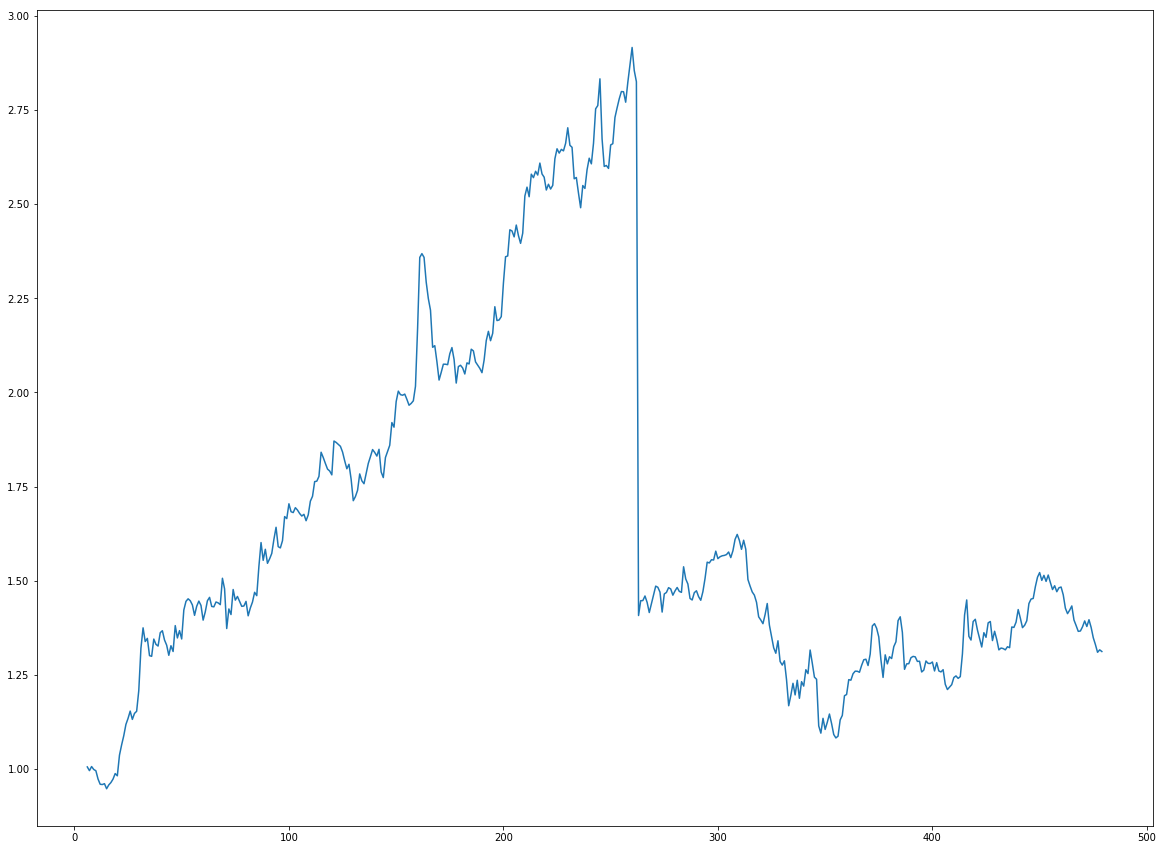

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

jubl['ncr%'].plot(kind='line',figsize=(20,15))
plt.show()